## Подготовка данных

**Описание данных**

Данные находятся в файле /datasets/Churn.csv (англ. «отток клиентов»).

**Признаки**

RowNumber — индекс строки в данных

CustomerId — уникальный идентификатор клиента

Surname — фамилия

CreditScore — кредитный рейтинг

Geography — страна проживания

Gender — пол

Age — возраст

Tenure — сколько лет человек является клиентом банка

Balance — баланс на счёте

NumOfProducts — количество продуктов банка, используемых клиентом

HasCrCard — наличие кредитной карты

IsActiveMember — активность клиента

EstimatedSalary — предполагаемая зарплата

**Целевой признак**

Exited — факт ухода клиента

<div class="alert alert-block alert-success">
<b>Успех👍:</b> 
    
Расписать признаки - удобно)
</div>

In [2]:
!pip install phik

     |████████████████████████████████| 709 kB 1.3 MB/s eta 0:00:01


In [3]:
# Загрузка необходимых библиотек
import pandas as pd
import matplotlib as plt
from math import ceil
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score 
from sklearn.metrics import precision_score 
from sklearn.metrics import recall_score 

from joblib import dump
from sklearn.metrics import roc_curve 
from sklearn.metrics import roc_auc_score

import numpy as np

In [4]:
# Чтение файла
df = pd.read_csv('/datasets/Churn.csv')

In [5]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Пропушены 909 строк, важно узнать что между ними общего, все они отвечают тому, сколько лет человек является клиентом банка.

In [7]:
_nan = df.query('Tenure.isna()').describe()
_nan

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,909.000000,9.090000e+02,909.000000,909.000000,0.0,909.000000,909.000000,909.000000,909.000000,909.000000,909.000000
mean,4866.386139,1.568981e+07,648.451045,38.647965,NaN,76117.341474,1.530253,0.710671,0.510451,99180.389373,0.201320
std,2909.604343,7.511225e+04,99.079381,9.785438,NaN,63105.690715,0.588452,0.453701,0.500166,56378.063765,0.401207
min,31.000000,1.556581e+07,359.000000,18.000000,NaN,0.000000,1.000000,0.000000,0.000000,106.670000,0.000000
25%,2311.000000,1.562658e+07,580.000000,32.000000,NaN,0.000000,1.000000,0.000000,0.000000,49872.330000,0.000000
50%,4887.000000,1.568687e+07,647.000000,37.000000,NaN,96674.550000,1.000000,1.000000,1.000000,99444.020000,0.000000
75%,7306.000000,1.575680e+07,718.000000,43.000000,NaN,128554.980000,2.000000,1.000000,1.000000,145759.700000,0.000000
max,10000.000000,1.581569e+07,850.000000,92.000000,NaN,206663.750000,4.000000,1.000000,1.000000,199390.450000,1.000000


In [8]:
_all = df.describe()
_all

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
_nan / _all

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,0.090900,0.090900,0.090900,0.090900,0.0,0.090900,0.090900,0.090900,0.090900,0.090900,0.090900
mean,0.973180,0.999928,0.996806,0.992964,NaN,0.995181,1.000035,1.007330,0.990975,0.990910,0.988317
std,1.007866,1.044151,1.025101,0.933030,NaN,1.011351,1.011686,0.995305,1.000738,0.980309,0.996124
min,31.000000,1.000007,1.025714,1.000000,NaN,NaN,1.000000,NaN,NaN,9.211572,NaN
25%,0.924123,0.999875,0.993151,1.000000,NaN,NaN,1.000000,NaN,NaN,0.977848,NaN
50%,0.977302,0.999753,0.992331,1.000000,NaN,0.994609,1.000000,1.000000,1.000000,0.992516,NaN
75%,0.974101,1.000227,1.000000,0.977273,NaN,1.007135,1.000000,1.000000,1.000000,0.975711,NaN
max,1.000000,1.000000,1.000000,1.000000,NaN,0.823696,1.000000,1.000000,1.000000,0.996990,1.000000


После анализа распределения признаков и их относительных величин, я принимаю решение заполнить пропуски медианным значением.

In [10]:
df = df.fillna(df.query('~Tenure.isna()').median())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Пропуски ликвидированны.

In [12]:
df['Tenure'].value_counts()

5.0     1836
1.0      952
2.0      950
8.0      933
3.0      928
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
0.0      382
Name: Tenure, dtype: int64

Также странная аномалия с занчением `5` в столбце `Tenure` в виде `4.99769`.

In [13]:
df['Tenure'].value_counts(normalize=True)

5.0     0.1836
1.0     0.0952
2.0     0.0950
8.0     0.0933
3.0     0.0928
7.0     0.0925
4.0     0.0885
9.0     0.0882
6.0     0.0881
10.0    0.0446
0.0     0.0382
Name: Tenure, dtype: float64

Причем таких знаяений столько же, сколько и значений `5`. Я предполагаю что половина значений `5` претерпели ошибку. Поэтому округлю вверх соответствующие значения, пототому что это принципиально важно для задачи классивикации: такие значения будут расцениваться как самостоятельный класс

In [14]:
df['Tenure'] = df['Tenure'].apply(ceil).astype('int')

In [15]:
df['Tenure'].value_counts()

5     1836
1      952
2      950
8      933
3      928
7      925
4      885
9      882
6      881
10     446
0      382
Name: Tenure, dtype: int64

Быстрая проверка признаков на мультиколлинеарность, чтобы знать какие оставлять.

<AxesSubplot:>

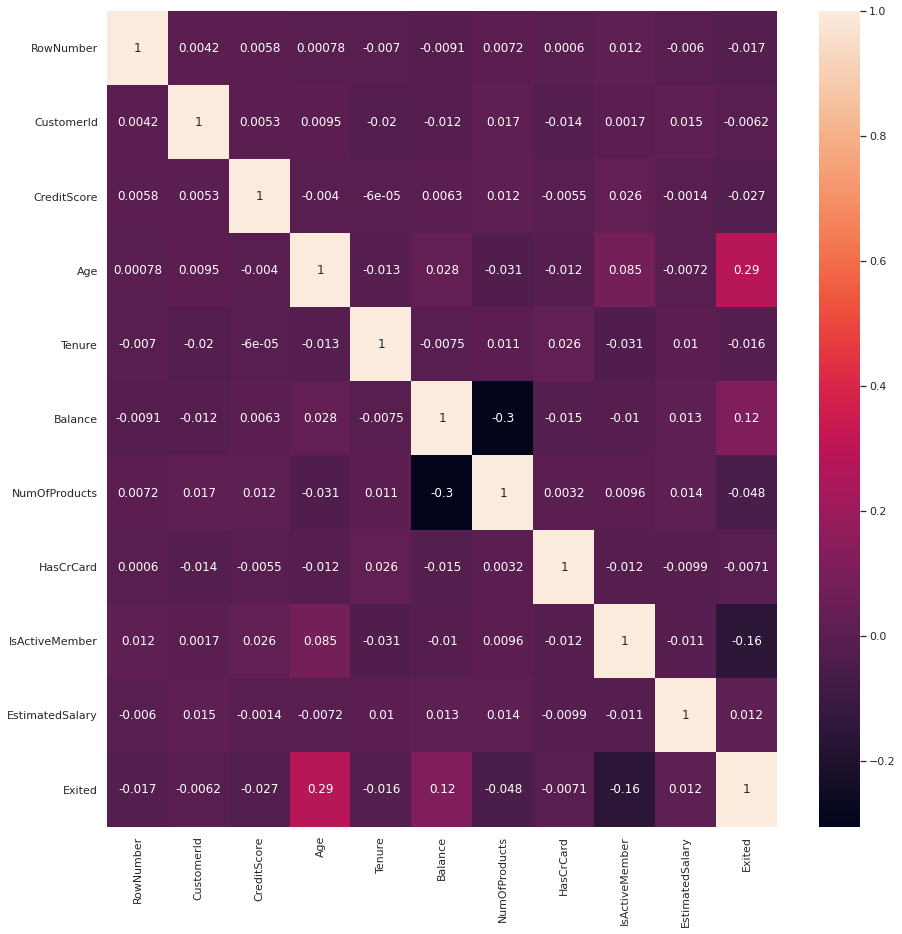

In [16]:
corr_matrix = df.corr()
sns.set(rc={"figure.figsize":(15, 15)})
sns.heatmap(corr_matrix, annot=True)

Высоких значений нет, все приизнаки остаются.

## Исследование задачи

Перевод категориальных признаков *OHT*.

In [21]:
df = pd.get_dummies(df, columns=['Gender','Geography'], drop_first= True )
None

In [22]:
df

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_Male,Geography_Germany,Geography_Spain
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,9997,15569892,Johnstone,516,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,9998,15584532,Liu,709,36,7,0.00,1,0,1,42085.58,1,0,0,0
9998,9999,15682355,Sabbatini,772,42,3,75075.31,2,1,0,92888.52,1,1,1,0


In [23]:
features = df.drop(['RowNumber','CustomerId','Surname','Exited'],axis=1)
target = df['Exited']

In [24]:
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=12345, stratify=target)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.50, random_state=12345, stratify=target_valid_test)

Я разделил датасет на тренировочну, валидационную и тестовую выборки в отношениее 3:1:1. Сделано это было в 2 этапа.

In [25]:
_list = ['CreditScore','Age','Tenure','Balance','EstimatedSalary']
scaler = StandardScaler()
    
features_train.loc[:,_list] = scaler.fit_transform(features_train.loc[:,_list])
features_valid.loc[:,_list] = scaler.fit_transform(features_valid.loc[:,_list])
features_test.loc[:,_list] = scaler.fit_transform(features_test.loc[:,_list])

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

In [26]:
features_train.loc[:,_list]

,CreditScore,Age,Tenure,Balance,EstimatedSalary
2837,-1.040434,0.953312,0.360600,0.774657,-0.119110
9925,0.454006,-0.095244,-0.002786,1.910540,-0.258658
8746,0.103585,-0.476537,1.087371,0.481608,1.422836
660,-0.184996,0.190726,-0.002786,0.088439,-1.160427
3610,-0.720933,1.620574,-1.456328,0.879129,0.113236
...,...,...,...,...,...
6172,-0.844611,0.381372,-0.002786,0.180068,0.117350
2360,-1.359935,0.190726,-0.002786,0.547724,-0.192524
4499,-1.174418,0.476696,-0.366172,0.727840,0.531933
9162,0.155118,2.287837,-0.002786,0.449382,-1.307769


Выгрузка 3 моделей классификации, которые мы проходили в курсе и метрики.

Лучший результат показал лес с 110 деревьями высотой 15 и 1 листом: 0.62

Логистическая регрессия.

In [28]:
result_f_best3 = 0
for _iter in range(700,2501,100):
    for c in np.arange(0.02, 1.01, 0.02):
        model3 = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=_iter, C=c) 
        model3.fit(features_train, target_train)
        dump(model3, 'model_9_1.joblib')
        probabilities_valid = model3.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 
        predictions_valid = model3.predict(features_valid)
        result_a = accuracy_score(target_valid, predictions_valid)
        result_p = precision_score(target_valid, predictions_valid)
        result_r = recall_score(target_valid, predictions_valid)
        result_f = f1_score(target_valid, predictions_valid)
        if result_f > result_f_best3:
            print(f'max_iter={_iter}, C={c}')
            print("accuracy на валидационной выборке:", result_a)
            print("precision на валидационной выборке:", result_p)
            print("result_r на валидационной выборке:", result_r)
            print("f1 на валидационной выборке:", result_f)
            print("auc_roc на валидационной выборке:", auc_roc)
            print()
            result_f_best3 = result_f

max_iter=700, C=0.02
accuracy на валидационной выборке: 0.81
precision на валидационной выборке: 0.625
result_r на валидационной выборке: 0.1715686274509804
f1 на валидационной выборке: 0.2692307692307692
auc_roc на валидационной выборке: 0.7914788402798306

max_iter=700, C=0.04
accuracy на валидационной выборке: 0.81
precision на валидационной выборке: 0.6111111111111112
result_r на валидационной выборке: 0.18872549019607843
f1 на валидационной выборке: 0.2883895131086142
auc_roc на валидационной выборке: 0.7897791654350182

max_iter=700, C=0.06
accuracy на валидационной выборке: 0.81
precision на валидационной выборке: 0.6060606060606061
result_r на валидационной выборке: 0.19607843137254902
f1 на валидационной выборке: 0.2962962962962963
auc_roc на валидационной выборке: 0.789110996157257

max_iter=700, C=0.08
accuracy на валидационной выборке: 0.811
precision на валидационной выборке: 0.6136363636363636
result_r на валидационной выборке: 0.19852941176470587
f1 на валидационной выбо

Лучшая модель, с параметрами max_iter=700, C=0.92 показала 0.31

Лучший результат показал лес с 110 деревьями высотой 15 и 1 листом: 0.62. Его и возьмем как основную модель.

## Борьба с дисбалансом

In [27]:
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [28]:
target_train.value_counts()

0    4778
1    1222
Name: Exited, dtype: int64

Есть наличие дисбаланса в классах: `0` класса в 4 раза больше чем `1`.

In [29]:
from sklearn.utils import shuffle

In [30]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

In [31]:
features_train_up, target_train_up = upsample(features_train, target_train, 4)

In [32]:
target_train_up.value_counts()

1    4888
0    4778
Name: Exited, dtype: int64

Меньший класс увеличил в 4 раза


In [33]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

In [34]:
features_down, target_down = downsample(features_train, target_train, 0.5)

In [35]:
target_down.value_counts()

0    2389
1    1222
Name: Exited, dtype: int64

## Тестирование модели

Продолжим смотреть на результаты. Сейчас решающий лес

In [38]:
model4 = RandomForestClassifier(random_state=12345, n_estimators=110, max_depth=15, min_samples_leaf=1)
model4.fit(features_train_up, target_train_up)
predictions_valid = model4.predict(features_valid) 
probabilities_valid = model4.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
result_p = precision_score(target_valid, predictions_valid)
result_r = recall_score(target_valid, predictions_valid)
result_f = f1_score(target_valid, predictions_valid)
print("precision на валидационной выборке:", result_p)
print("result_r на валидационной выборке:", result_r)
print("auc_roc на валидационной выборке:", auc_roc)
print("f1 на валидационной выборке:", result_f)

precision на валидационной выборке: 0.649867374005305
result_r на валидационной выборке: 0.6004901960784313
auc_roc на валидационной выборке: 0.8648843174204356
f1 на валидационной выборке: 0.6242038216560509


In [39]:
model5 = RandomForestClassifier(random_state=12345, n_estimators=110, max_depth=15, min_samples_leaf=1)
model5.fit(features_down, target_down)
predictions_valid = model5.predict(features_valid) 
probabilities_valid = model5.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
result_p = precision_score(target_valid, predictions_valid)
result_r = recall_score(target_valid, predictions_valid)
result_f = f1_score(target_valid, predictions_valid)
print("precision на валидационной выборке:", result_p)
print("result_r на валидационной выборке:", result_r)
print("auc_roc на валидационной выборке:", auc_roc)
print("f1 на валидационной выборке:", result_f)

precision на валидационной выборке: 0.6356968215158925
result_r на валидационной выборке: 0.6372549019607843
auc_roc на валидационной выборке: 0.8647588432357868
f1 на валидационной выборке: 0.6364749082007344


После апсемплинга результат почти не изменился, а после даунсемплинга общий результат улучшился на полтора процента

Теперь стоит попробовать улучшить результат у логистической регрессии

In [37]:
model_log_up = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=700, C=0.92) 
model_log_up.fit(features_train_up, target_train_up)
predictions_valid = model_log_up.predict(features_valid)
probabilities_valid = model_log_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 
predictions_valid = model_log_up.predict(features_valid)
result_a = accuracy_score(target_valid, predictions_valid)
result_p = precision_score(target_valid, predictions_valid)
result_r = recall_score(target_valid, predictions_valid)
result_f = f1_score(target_valid, predictions_valid)
print("accuracy на валидационной выборке:", result_a)
print("precision на валидационной выборке:", result_p)
print("result_r на валидационной выборке:", result_r)
print("f1 на валидационной выборке:", result_f)
print("auc_roc на валидационной выборке:", auc_roc)

accuracy на валидационной выборке: 0.73
precision на валидационной выборке: 0.4100817438692098
result_r на валидационной выборке: 0.7377450980392157
f1 на валидационной выборке: 0.5271453590192645
auc_roc на валидационной выборке: 0.793697347029264


In [38]:
model_log_down = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=700, C=0.92) 
model_log_down.fit(features_down, target_down)
predictions_valid = model_log_down.predict(features_valid)
probabilities_valid = model_log_down.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid) 
predictions_valid = model_log_down.predict(features_valid)
result_a = accuracy_score(target_valid, predictions_valid)
result_p = precision_score(target_valid, predictions_valid)
result_r = recall_score(target_valid, predictions_valid)
result_f = f1_score(target_valid, predictions_valid)
print("accuracy на валидационной выборке:", result_a)
print("precision на валидационной выборке:", result_p)
print("result_r на валидационной выборке:", result_r)
print("f1 на валидационной выборке:", result_f)
print("auc_roc на валидационной выборке:", auc_roc)

accuracy на валидационной выборке: 0.7295
precision на валидационной выборке: 0.41025641025641024
result_r на валидационной выборке: 0.7450980392156863
f1 на валидационной выборке: 0.5291557876414275
auc_roc на валидационной выборке: 0.794140740467041


Модель логистической регрессии не получилось довести до нужной результативности.

Тестирование двух моделей: дерево и лес

In [41]:
# Лес
model6 = RandomForestClassifier(random_state=12345, n_estimators=110, max_depth=15, min_samples_leaf=1)
model6.fit(features_down, target_down)
predictions_test = model5.predict(features_test) 
probabilities_test = model5.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc = roc_auc_score(target_test, probabilities_one_test)
result_p = precision_score(target_test, predictions_test)
result_r = recall_score(target_test, predictions_test)
result_f = f1_score(target_test, predictions_test)
print("precision на тестовой выборке:", result_p)
print("result_r на тестовой выборке:", result_r)
print("auc_roc на тестовой выборке:", auc_roc)
print("f1 на тестовой выборке:", result_f)

precision на тестовой выборке: 0.5990220048899756
result_r на тестовой выборке: 0.601965601965602
auc_roc на тестовой выборке: 0.8466070076239568
f1 на тестовой выборке: 0.6004901960784315


Была получена подходящая модель, решающий лес (0.60) 

<div class="alert alert-block alert-warning">
<b>Комментарий студента V3:</b> Дерево убрал, с регрессией разобрался, вывод внизу
</div>

## Вывод

В ходе работы были испытаны 3 модели: решающее дерево, случайный лес, логистическая регрессия. В ходе анализа исходных данных был обнаружен дисбаланс классов, после чего были приняты следующие попытки это исправить: апсэмплинг, даунсэмплинг, понижение порога, сбалансирование вклассов (ЛР). 
- Лучшие метрики показал метод случайного леса с использованием даунсэмплинга данных, его f1-метри составила 0.60. 
- Среди исследованных моделей рекомендую использовать *случайный лес* с следующими гиперпараметрами: `n_estimators=110`, `max_depth=15`, `min_samples_leaf=1`. 